<a href="https://colab.research.google.com/github/benjym/civl2010/blob/master/Logistic_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic Growth With Harvesting and Delays
University of Sydney - School of Civil Engineering
CIVL2010 Environmental Engineering

Equation:
$$x_{t+\Delta t} = x_t + rx_t\left(1-\frac{x_{t-\tau_1}}{k}\right)\Delta t - \left(r_hx_{t-\tau_2} + h\right)\Delta t$$

Units:
- $S$ is units of stock $x$ (e.g. number of trees in a forest; mass of fish; surface area covered with wheat)
- $T$ is units of time (e.g. day, month, year)


In [162]:
# This function contains the equation above and iterates over time to calculate the final result
def calculate_results(inputs):
    t = np.linspace(inputs['t_s'],inputs['t_e']+1,1000)
    delta_t = t[1] - t[0]
    x = np.zeros_like(t)
    x[0] = inputs['x_0']
    for i,this_t in enumerate(t[:-1]): # i is the iteration, this_t is the current time
        tau_1_arg = np.argmin(np.abs(t - (this_t - inputs['tau_1']))) # closest point in time to t - tau_1
        tau_2_arg = np.argmin(np.abs(t - (this_t - inputs['tau_2']))) # closest point in time to t - tau_2
        # print(i,tau_1_arg,tau_2_arg)
        x[i+1] = x[i] + inputs['r']*x[i]*(1-x[tau_1_arg]/inputs['k'])*delta_t - (inputs['r_h']*x[tau_2_arg] + inputs['h'])*delta_t
        x[i+1] = np.maximum(0,x[i+1]) # make sure it doesn't go below zero
    return t,x

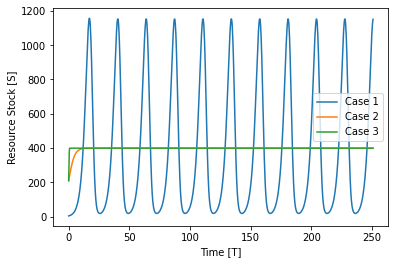

In [169]:
input1 = {
    't_s': 0, # start time [T] (>= 0)
    't_e': 250, # end time [T] (> 0)
    'x_0': 5, # initial resource level [S] (>= 0)
    'r': 0.4, # relative growth rate [S.S^-1.T^-1] (>= 0)
    'k': 400, # maximum capacity [S] (> 0)
    'r_h': 0, # relative harvest rate (stock-limited part) [S.S^-1.T^-1] (>= 0)
    'h': 0, # harvest rate (constant part) [S.T^-1] (>= 0)
    'tau_1': 5, # delay for capacity-adjusted growth [T] (>= 0)
    'tau_2': 10, # delay for stock-limited harvest [T] (>= 0)
}

input2 = {
    't_s': 0, # start time [T] (>= 0)
    't_e': 250, # end time [T] (> 0)
    'x_0': 210, # initial resource level [S] (>= 0)
    'r': 0.4, # relative growth rate [S.S^-1.T^-1] (>= 0)
    'k': 400, # maximum capacity [S] (> 0)
    'r_h': 0, # relative harvest rate (stock-limited part) [S.S^-1.T^-1] (>= 0)
    'h': 0, # harvest rate (constant part) [S.T^-1] (>= 0)
    'tau_1': 0, # delay for capacity-adjusted growth [T] (>= 0)
    'tau_2': 0, # delay for stock-limited harvest [T] (>= 0)
}

input3 = {
    't_s': 0, # start time [T] (>= 0)
    't_e': 250, # end time [T] (> 0)
    'x_0': 210, # initial resource level [S] (>= 0)
    'r': 4, # relative growth rate [S.S^-1.T^-1] (>= 0)
    'k': 400, # maximum capacity [S] (> 0)
    'r_h': 0, # relative harvest rate (stock-limited part) [S.S^-1.T^-1] (>= 0)
    'h': 1, # harvest rate (constant part) [S.T^-1] (>= 0)
    'tau_1': 0, # delay for capacity-adjusted growth [T] (>= 0)
    'tau_2': 0, # delay for stock-limited harvest [T] (>= 0)
}

inputs = [input1,input2,input3] # copy and paste an input above to create a new one, then add it to the list to make more than three inputs

for i,input in enumerate(inputs):
    t, x = calculate_results(input)
    plt.plot(t,x,label=f'Case {i+1}')
plt.xlabel('Time [T]')
plt.ylabel('Resource Stock [S]')
plt.legend()
plt.show()